# Imports

In [1]:
from traj_check import trajcheck

# traj_plot not working due to problem with basemap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import metpy.calc as mcalc
from metpy.units import units
from station_plot import plot_station
from sounding_df import sounding_df as sd
from sounding_finder import sounding_finder
# Loading sounding data at sheba
from sheba_df import sheba_df
from meteo import spec_humidity
from siphon.simplewebservice.igra2 import IGRAUpperAir
from traj_plot import traj_plot
from traj_plot_v2 import traj_plot_v2
import xarray as xr
import pandas as pd

ds_T_jan = xr.open_dataset('/home/ollie/muali/Data/netcdf_files/T_1998-01-01-to-1998-01-31ERA-I.nc')
ds_q_jan = xr.open_dataset('/home/ollie/muali/Data/netcdf_files/q_1998-01-01-to-1998-01-31ERA-I.nc')

ds_ERA_5_jan = xr.open_dataset('/home/ollie/muali/Data/netcdf_files/T_q_g_Era-5-Jan1998.nc')

# path to all trajectory files
path_traj= '/home/ollie/muali/Data/winter_all/'

In [8]:
pd.set_option('display.max_columns',30)

# 4 Jan 1998 23:15


## At SHEBA

In [2]:
# sheba df 4th Jan 23:00
df_she7 = sheba_df('/home/ollie/muali/data_work/Sounding_data/unzipped_data/1998_01_ascii/y1042316.she', dropnan=True)
she7 = sd(df_she7)

q_she7 = she7.spec_humidity()
rh_she7 = she7.relative_humidity()
rhi_she7 = she7.relative_humidity_ice()
#tpw_she7 = she7.tpw()
# throws up tuple indices error
pot_she7 = she7.potential_t()

In [9]:
df_she7.head(5)

,Time,pressure,temperature,dewpoint,relative_humidity,Uwind,Vwind,Wspd,Dir,dZ,Lon,Lat,Rng,Az,Alt,Qp,Qt,Qh,Qu,Qv,Quv
0,0.0,1011.0,252.25,249.45,78.6,3.7,-0.5,3.8,277.8,10.2,-149.310,74.875,999.0,999.0,19.7,99.0,99.0,99.0,99.0,99.0,99.0
1,1.0,1009.8,252.15,249.45,79.2,999.0,999.0,999.0,999.0,8.6,-149.310,74.875,999.0,999.0,28.6,99.0,99.0,99.0,99.0,99.0,99.0
2,2.0,1008.9,252.05,249.45,79.6,3.0,-0.5,3.0,279.6,6.6,-149.310,74.875,999.0,999.0,35.1,99.0,99.0,99.0,99.0,99.0,99.0
3,3.0,1008.2,252.05,249.35,79.7,2.8,-0.6,2.9,281.1,5.1,-149.309,74.875,999.0,999.0,40.0,99.0,99.0,99.0,99.0,99.0,99.0
4,4.0,1007.6,251.95,249.35,79.8,2.8,-0.6,2.9,282.9,4.0,-149.309,74.875,999.0,999.0,44.4,99.0,99.0,99.0,99.0,99.0,99.0


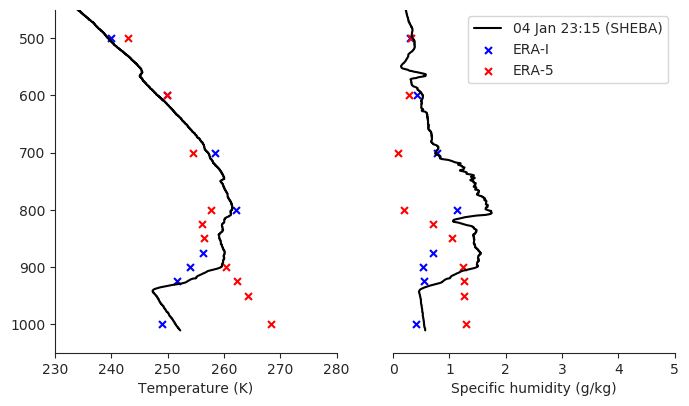

In [13]:
fig = plt.figure(figsize=(8,10), dpi=100)
ax1 = plt.subplot(2,2,1)
levels_ERA_I = ds_T_jan.level.values
levels_era5 = ds_ERA_5_jan.level.values

ax1.plot(she7.T, she7.p, c='k')
ax1.scatter(ds_T_jan.t.sel(time='1998-01-04 23:15', level=levels_ERA_I,  # ERA-I
                                    latitude=74.875, longitude=-149.310, method='nearest').values,
            levels_ERA_I, s=25, marker='x', color='b')
ax1.scatter(ds_ERA_5_jan.t.sel(time='1998-01-04 23:15', level=ds_ERA_5_jan.level.values, 
                                    latitude=74.875, longitude=-149.310, method='nearest').values, 
           levels_era5, s=25, marker='x', color='r')


ax1.invert_yaxis()
ax1.set(ylim=[1050,450], xlim=(230,280), xlabel='Temperature (K)')

ax2 = plt.subplot(2,2,2)
ax2.plot(q_she7, she7.p, c='k', label='04 Jan 23:15 (SHEBA)')
ax2.scatter(ds_q_jan.q.sel(time='1998-01-04 23:15', level=levels_ERA_I,  # ERA-I
                                    latitude=74.875, longitude=-149.310, method='nearest').values * 1000, 
           levels_ERA_I, s=25, marker='x', color='b', label='ERA-I')

ax2.scatter(ds_ERA_5_jan.q.sel(time='1998-01-04 23:15', level=levels_era5,   # ERA-5
                                    latitude=74.875, longitude=-149.310, method='nearest').values * 1000, 
           levels_era5, s=25, marker='x', color='r', label='ERA-5')
ax2.invert_yaxis()
ax2.set(ylim=[1050,450], xlim=(0,5), xlabel='Specific humidity (g/kg)', yticks=[])

plt.legend() # setting legend
sns.despine(fig)
sns.despine(ax=ax2, left=True )
sns.set_style("ticks")

In [16]:
ds_ERA_5_jan.latitude.values[:10]

array([90.  , 89.75, 89.5 , 89.25, 89.  , 88.75, 88.5 , 88.25, 88.  ,
       87.75], dtype=float32)

In [17]:
ds_T_jan.latitude.values[:10]

array([90.  , 89.25, 88.5 , 87.75, 87.  , 86.25, 85.5 , 84.75, 84.  ,
       83.25], dtype=float32)

## JNM00001001 (70.939N -8.667E)

Different levels are passing at different distances, farthest being 164.85 m and closest being 4.74 m.
Plotting air mass profile at the nearest grid points and comparing with station data.

To see how to present this information

In [3]:
#1998-01-01 21:00:00 JNM00001001 for 1850m
# 2 readings at 00 and 12:00
df_jnm1001 = sounding_finder(file='JNM00001001', from_line='#JNM00001001 1998 01 02',\
                           to_line='#JNM00001001 1998 01 02 12', to_df=1)

jnm1001 = sd(df_jnm1001)

q_jnm1001 = jnm1001.spec_humidity()
rh_jnm1001 = jnm1001.relative_humidity()
rhi_jnm1001 = jnm1001.relative_humidity_ice()
pot_jnm1001 = jnm1001.potential_t()

01-01-1998 17:00 JNM00001001 70.939 -8.667 1.054000000000002 3.2699999999999996 165.18681913291866

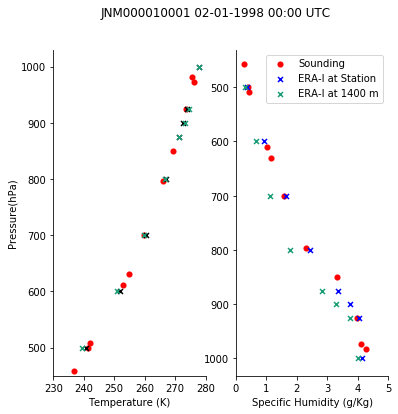

In [4]:
lat_traj = [70.9395 + 1.05 ]
lon_traj = [-8.667+3.27 ]
labels= ['ERA-I at 1400 m']
colors = ['#1b9e77', '#7570b3', '#d95f02']
levels, levels_era5 = ds_T_jan.level.values, ds_ERA_5_jan.level.values


fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(1,2,1) # (row,column,number)

ax1.scatter(jnm1001.T, jnm1001.p, color='r', linewidth=0.1, label='Sounding')

ax1.scatter(ds_T_jan.t.sel(time='1998-01-02 00:00', level=levels,  # ERA-I
                                    latitude=70.939, longitude=-8.667, 
                                    method='nearest').values, 
           levels,
           s=25, marker='x', color='k')
for i in range(0,1):
    ax1.scatter(ds_T_jan.t.sel(time='1998-01-02 00:00', level=levels,  # ERA-I
                                        latitude=lat_traj[i], longitude=lon_traj[i], 
                                        method='nearest').values, 
               levels,
               s=25, marker='x', color=colors[i])

#ax1.scatter(ds_ERA_5_jan.t.sel(time='1998-01-08 00:00', level=levels_era5, 
#                                     latitude=74.5, longitude=19.0, 
#                                     method='nearest').values, 
#            levels_era5, 
#             s=25, marker='X', color='b')

ax1.set(xlabel='Temperature (K)', ylabel='Pressure(hPa)', ylim=[1030,450], xlim=[230, 280])
ax1.invert_yaxis()

ax2 = plt.subplot(1,2,2)

ax2.scatter(q_jnm1001, jnm1001.p, color='r', linewidth=0.1, label='Sounding')
ax2.scatter(ds_q_jan.q.sel(time='1998-01-02 00:00', level=levels,  # ERA-I
                                    latitude=70.939, longitude=-8.667, 
                                    method='nearest').values * 1000, 
           levels, 
            s=25, marker='x', color='b', label='ERA-I at Station')
for  i in range(0,1):
    ax2.scatter(ds_q_jan.q.sel(time='1998-01-02 00:00', level=levels,  # ERA-I
                                        latitude=lat_traj[i], longitude=lon_traj[i], 
                                        method='nearest').values * 1000, 
               levels,
               s=25, marker='x', color=colors[i], label=labels[i])

# ax2.scatter(ds_ERA_5_jan.q.sel(time='1998-01-08 00:00', level=levels_era5,   # ERA-5
#                                     latitude=74.5, longitude=19.0, 
#                                     method='nearest').values * 1000, 
#            levels_era5, 
#             s=25, marker='X', color='g', label='ERA-5')
ax2.set(xlabel='Specific Humidity (g/Kg)', xlim=[0,5])
ax2.invert_yaxis()
plt.legend() # setting legend
sns.despine()
plt.suptitle('JNM000010001 02-01-1998 00:00 UTC', size = 12);

Good consistency for this station at the maximum approach of a trajectory

## GLM00004320 76.77N -18.668E

Different levels are passing at different distances, farthest being 182.77 m and closest being 50.84 m. Plotting air mass profile at the nearest grid points and comparing with station data.



In [5]:
# 2 readings at 11:00 and 23:00
df_glm4320 = sounding_finder(file='GLM00004320', from_line='#GLM00004320 1998 01 02 11',\
                           to_line='#GLM00004320 1998 01 02', to_df=1)
glm4320 = sd(df_glm4320)
q_glm4320 = glm4320.spec_humidity()

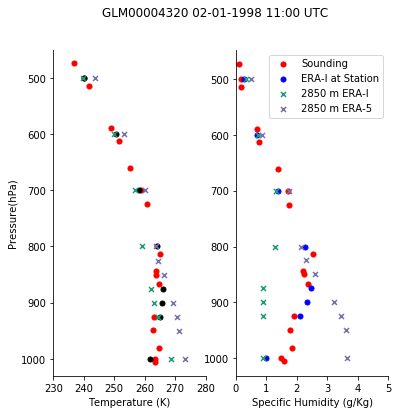

In [21]:
lat_traj = [76.77 - 0.53 ]
lon_traj = [-18.668 - 6.637 ]
labels= ['ERA-I at 2850 m']
colors = ['#1b9e77', '#7570b3', '#d95f02']
levels, levels_era5 = ds_T_jan.level.values, ds_ERA_5_jan.level.values


fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(1,2,1) # (row,column,number)

ax1.scatter(glm4320.T, glm4320.p, color='r', linewidth=0.1, label='Sounding')

ax1.scatter(ds_T_jan.t.sel(time='1998-01-02 12:00', level=levels,  # ERA-I
                                    latitude=76.77, longitude=-18.668, 
                                    method='nearest').values, 
           levels,
           s=25, marker='o', color='k')
for i in range(0,1):
    ax1.scatter(ds_T_jan.t.sel(time='1998-01-02 12:00', level=levels,  # ERA-I
                                        latitude=lat_traj[i], longitude=lon_traj[i], 
                                        method='nearest').values, 
               levels,
               s=25, marker='x', color=colors[i])

    ax1.scatter(ds_ERA_5_jan.t.sel(time='1998-01-02 12:00', level=levels_era5, 
                                 latitude=76.77, longitude=-18.668, 
                                     method='nearest').values, 
            levels_era5, 
            s=25, marker='x', color=colors[i+1])
ax1.invert_yaxis()
ax1.set(xlabel='Temperature (K)', ylabel='Pressure(hPa)', ylim=[1030,450], xlim=[230, 280])


ax2 = plt.subplot(1,2,2)

ax2.scatter(q_glm4320, glm4320.p, color='r', linewidth=0.1, label='Sounding')
ax2.scatter(ds_q_jan.q.sel(time='1998-01-02 12:00', level=levels,  # ERA-I
                                    latitude=76.77, longitude=-18.668, 
                                    method='nearest').values * 1000, 
           levels, 
            s=25, marker='o', color='b', label='ERA-I at Station')
for  i in range(0,1):
    ax2.scatter(ds_q_jan.q.sel(time='1998-01-02 11:00', level=levels,  # ERA-I
                                        latitude=lat_traj[i], longitude=lon_traj[i], 
                                        method='nearest').values * 1000, 
               levels,
               s=25, marker='x', color=colors[i], label=labels[i]+' ERA-I')

    ax2.scatter(ds_ERA_5_jan.q.sel(time='1998-01-02 12:00', level=levels_era5,   # ERA-5
                                 latitude=lat_traj[i], longitude=lon_traj[i], 
                                     method='nearest').values * 1000, 
           levels_era5, 
           s=25, marker='x', color=colors[i+1], label=labels[i]+' ERA-5')
ax2.set(xlabel='Specific Humidity (g/Kg)', xlim=[0,5])
ax2.invert_yaxis()
plt.legend() # setting legend
sns.despine()
plt.suptitle('GLM00004320 02-01-1998 11:00 UTC', size = 12);

Now, in cases like this, is that a problem of ERA-Interim in general underestimating the data? it could be that the observation at that grid point was nudged. Temperature profile is also showing a lot of disagreement! **To discuss what to do for such cases?**

**Note:** Disagreement betweem ERA-I and ERA-5 as well!

Looking at the trajectories, other levels are passing more inwards over Greenland compared to 2850 m. That could explain why 2850 m profile is relatively warmer and has more moisture